In [1]:
# Image classification MNIST
from keras.datasets import cifar10

Using TensorFlow backend.


In [15]:
#loading the datset
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [16]:
#print the  shape of the datset
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

In [17]:
#flattening the imagesfrom 28x28 pixels to 1D 787 pixels
x_train=x_train.reshape(x_train.shape[0],3,32,32)
x_test=x_test.reshape(x_test.shape[0],3,32,32)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [6]:
#normalising data to help with training
x_train/=255.0
x_test/=255.0

In [7]:
#one hot encode outputs
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]

In [8]:
import numpy 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

#create model
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(3,32,32),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
#compile model
epochs=25
lrate=0.01
decay=lrate/epochs
sgd=SGD(lr=lrate,momentum=0.9,decay=decay,nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 32, 32)         9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 16, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 16, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 16, 32)         9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [10]:
#fit the model
aa = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=32)
#final evaluation of the model
scores=model.evaluate(x_test,y_test,verbose=0)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
   64/50000 [..............................] - ETA: 42:04 - loss: 1.8367 - accuracy: 0.3438  

C:\Users\Chiranth SB\.conda\envs\tensorflow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.110759). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 487s 10ms/step - loss: 1.7797 - accuracy: 0.3544 - val_loss: 1.6322 - val_accuracy: 0.4083
Epoch 2/25
50000/50000 [==============================] - 141s 3ms/step - loss: 1.6520 - accuracy: 0.4019 - val_loss: 1.5414 - val_accuracy: 0.4484
Epoch 3/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.5966 - accuracy: 0.4243 - val_loss: 1.5353 - val_accuracy: 0.4476
Epoch 4/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.5539 - accuracy: 0.4374 - val_loss: 1.5109 - val_accuracy: 0.4519
Epoch 5/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.5235 - accuracy: 0.4523 - val_loss: 1.4583 - val_accuracy: 0.4726
Epoch 6/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.4994 - accuracy: 0.4586 - val_loss: 1.4384 - val_accuracy: 0.4876
Epoch 7/25
50000/50000 [==============================] - 69s 1ms/step - loss: 1.4827 - accuracy: 0.4674 - val_loss: 1.4280 - 

In [11]:
aa = aa.history

In [12]:
aa.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

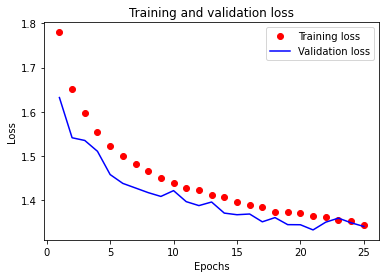

In [13]:
import matplotlib.pyplot as plt

acc = aa['accuracy']
val_acc = aa['val_accuracy']
loss = aa['loss']
val_loss = aa['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'ro', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

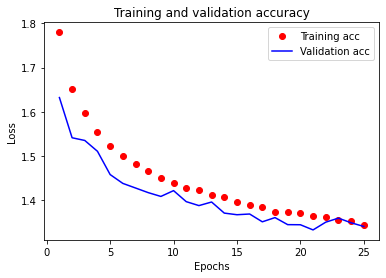

In [14]:
plt.clf()   # clear figure
loss = aa['loss']
val_loss = aa['val_loss']

plt.plot(epochs, loss, 'ro', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()